In [630]:
 #libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [632]:
# Importing lead dataset
lead_data = pd.read_csv("C:\\Users\\Godwin\\Downloads\\Lead Scoring Assignment\\Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [634]:
# checking the shape of the data 
lead_data.shape


(9240, 37)

In [636]:
# checking non null count and datatype of the variables
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [638]:
# Describing data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [640]:
#From description about counts, we can see that there are missing values present in our data

In [642]:
#There are Select values in many columns. Select values are as good as NULL. So we can convert these values to null values.

# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [644]:
# checking the columns for null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [646]:
# Finding the null percentages across columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [648]:
# dropping the columns with missing values greater than 40%

# dropping the columns with missing values greater than or equal to 40% .
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [650]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

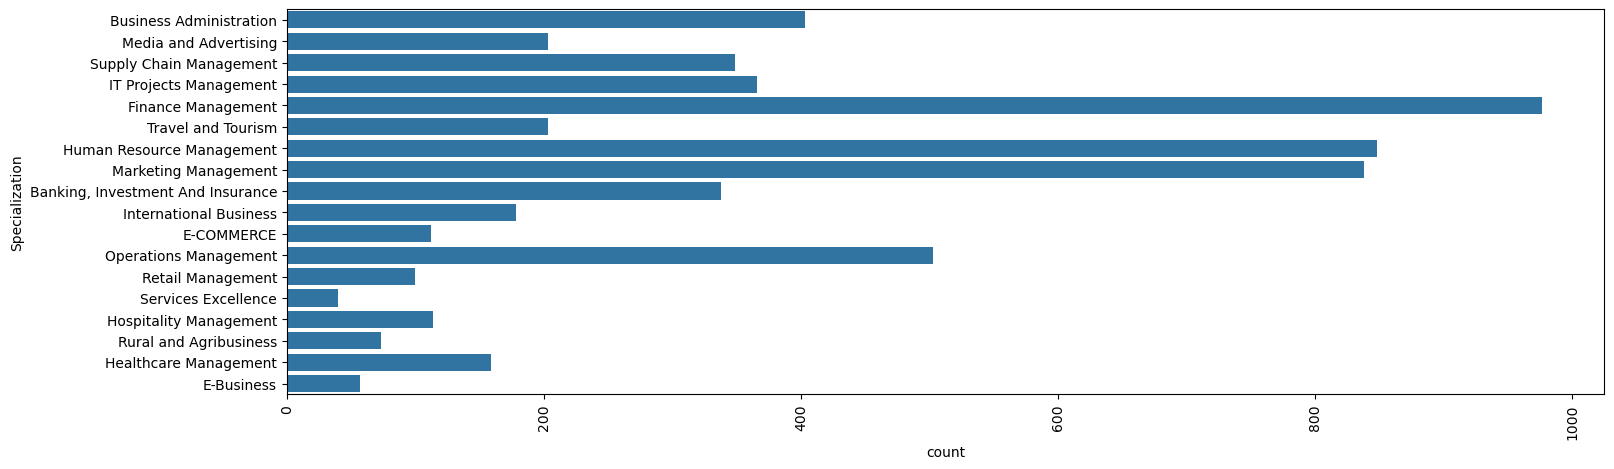

In [652]:
#Column'Specialization' has 37% missing values
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation=90)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

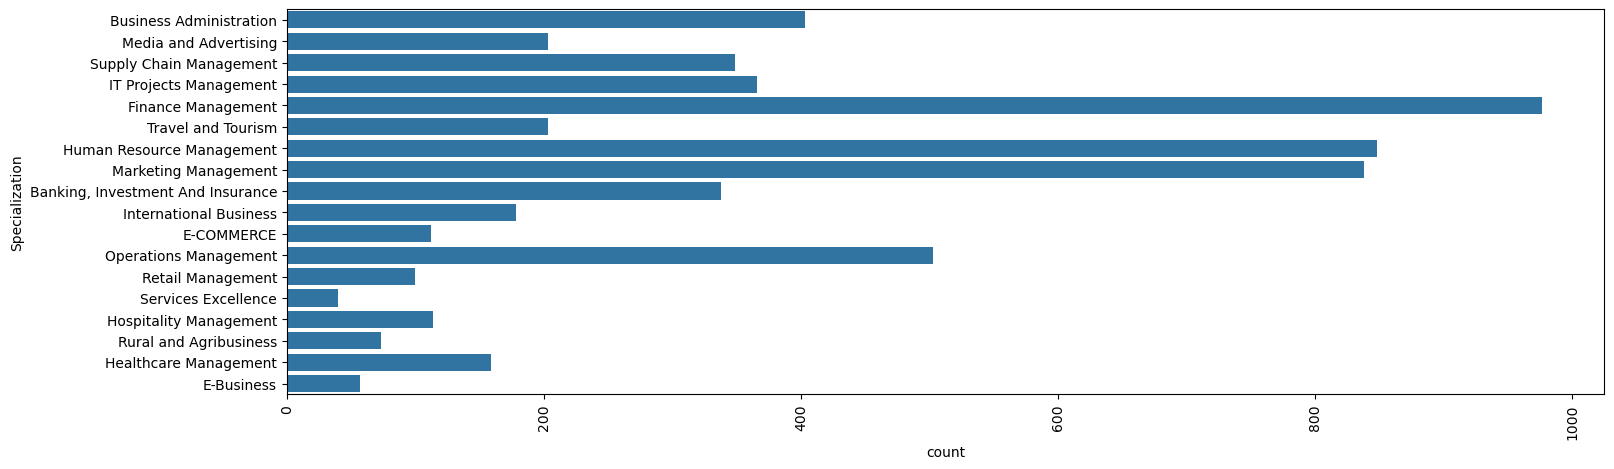

In [653]:
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation=90)

In [655]:
#There is 37% missing values present in the Specialization column. Possibility that specialization is not there in the options given. 
#So we can create a another category 'Other Course' for this.

lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Other Courses')

In [656]:
#City column has 40% missing values
# Finding the percentage of the different categories of this column:
round(lead_data['City'].value_counts(normalize=True),2)*100

City
Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: proportion, dtype: float64

In [658]:
#Since most values are 'Mumbai' , we can impute missing values in this column with this value
lead_data['City']=lead_data['City'].replace(np.nan,'Mumbai')

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000'),
  Text(8000.0, 0, '8000')])

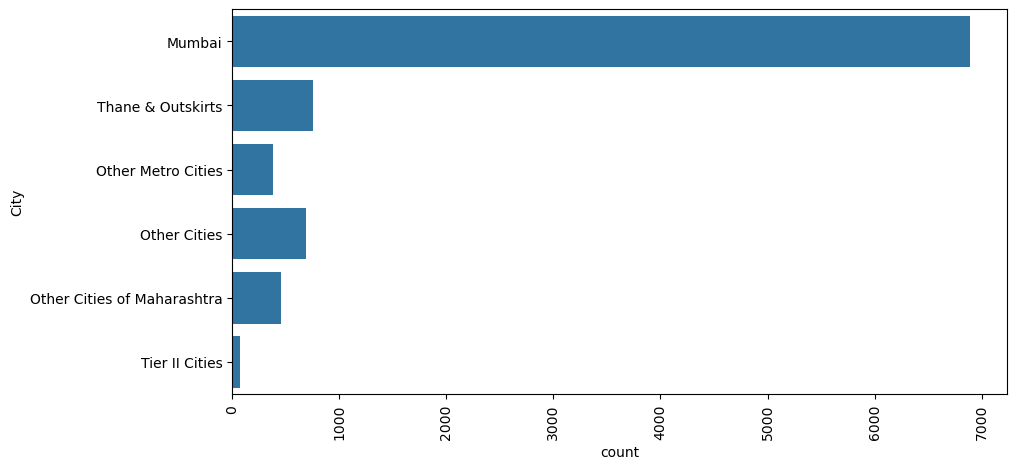

In [662]:
plt.figure(figsize=(10,5))
sns.countplot(lead_data['City'])
plt.xticks(rotation=90)

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 [Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000'),
  Text(2250.0, 0, '2250')])

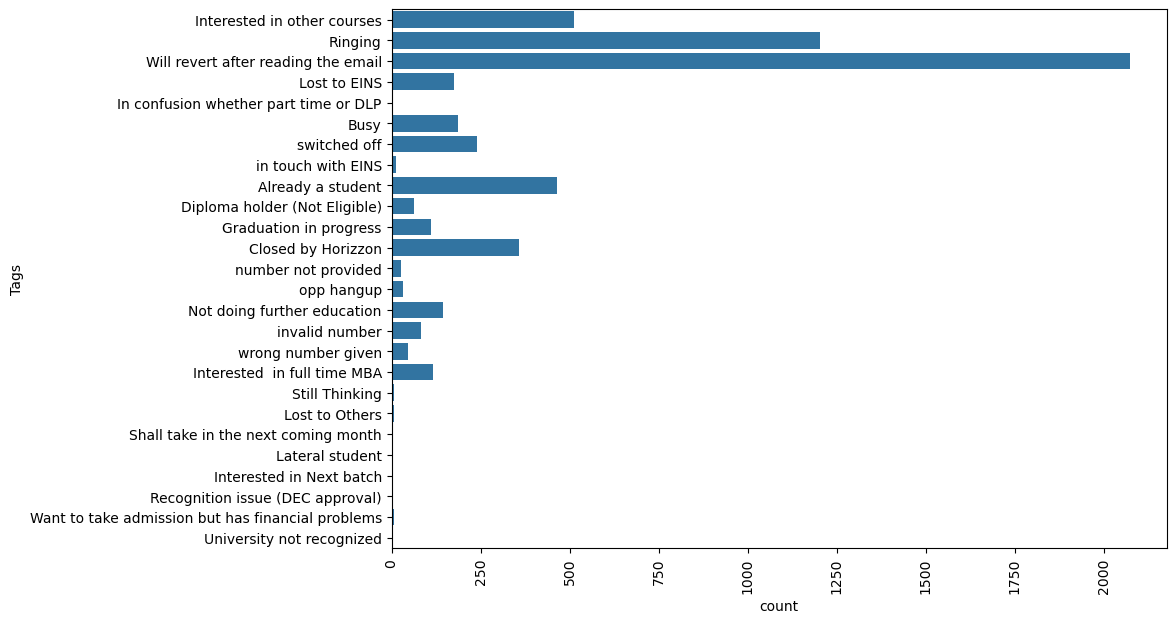

In [663]:
#'Tags' column has 36% missing values
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(lead_data['Tags'])
plt.xticks(rotation=90)

In [664]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000')])

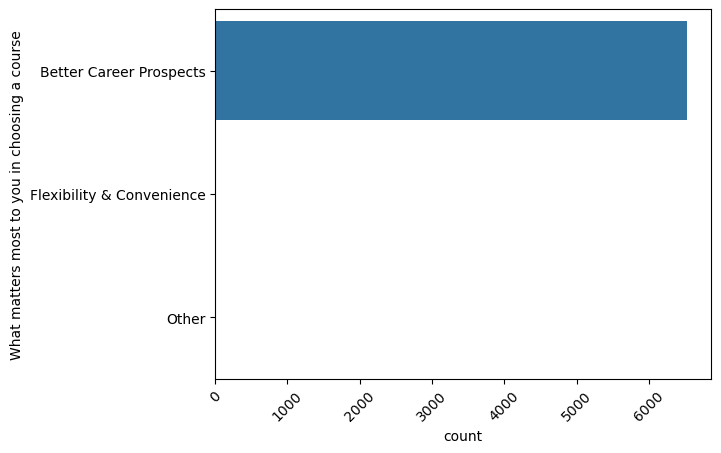

In [666]:
# 'What matters most to you in choosing a course' has 29% missing values
# Visualizing this column
sns.countplot(lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

In [667]:
# Dropping this column since it is highly skewed
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

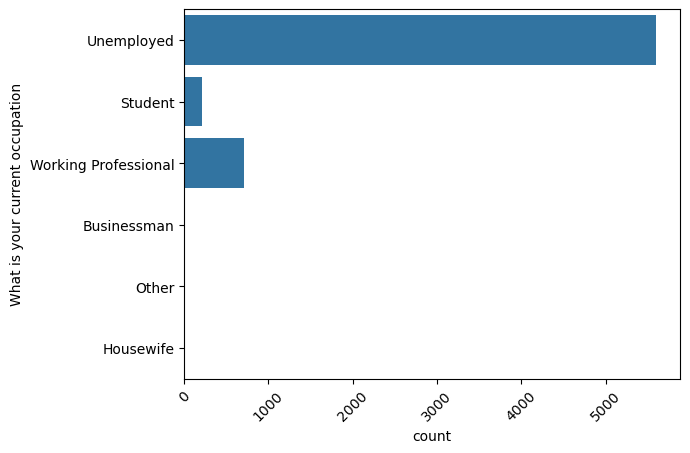

In [670]:
#'What is your current occupation' has 29% missing values
sns.countplot(lead_data['What is your current occupation'])
plt.xticks(rotation=45)

In [673]:
# Finding the percentage of the different categories of this column:
round(lead_data['What is your current occupation'].value_counts(normalize=True),2)*100

What is your current occupation
Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: proportion, dtype: float64

In [674]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000')])

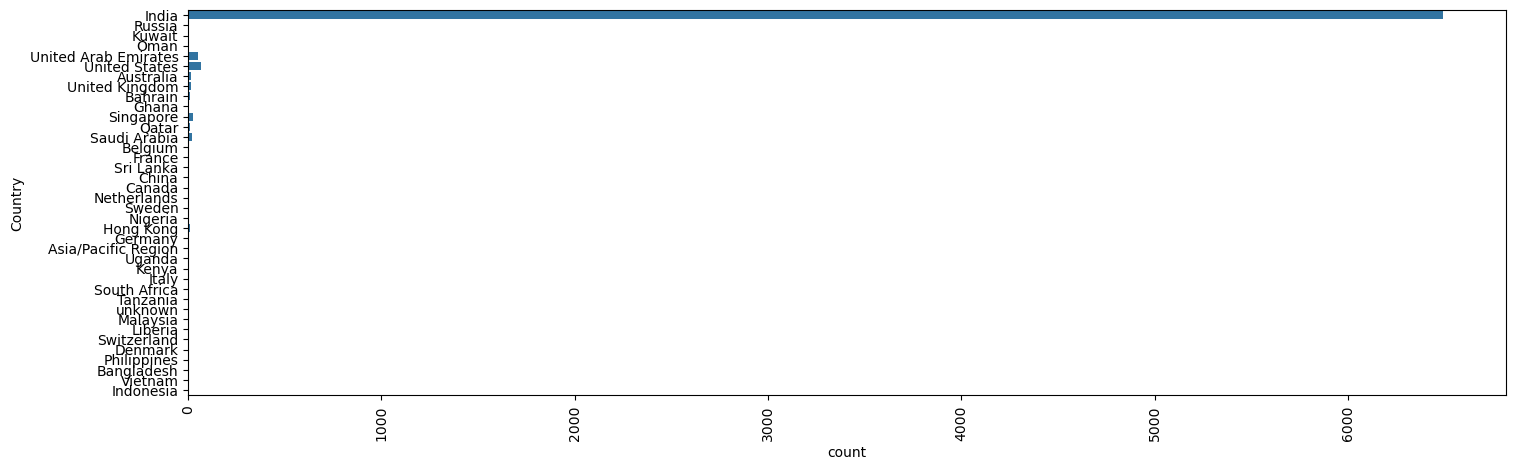

In [678]:
# 'Country' column has 27% missing values
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Country'])
plt.xticks(rotation=90)

In [679]:
# Imputing the missing data in the 'Country' column with 'India'
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

In [680]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [684]:
# Dropping the rows with null values
lead_data.dropna(inplace = True)

In [686]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [688]:
#EDA


In [690]:
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [692]:
#Univariate Analysis and Bivariate Analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

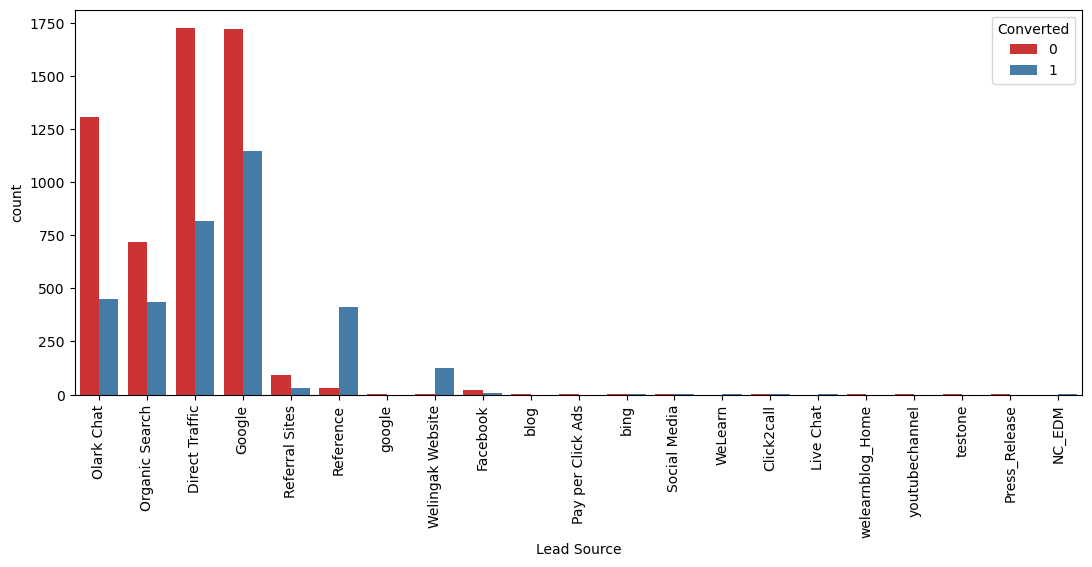

In [694]:
#lead Source
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Set1')
plt.xticks(rotation = 90)

In [696]:
#Since many of the sources from where the leads are generated, we shall label them as others
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


In [698]:
# Inference
# Google and Direct traffic generates maximum number of leads.
# Conversion Rate of reference leads and leads through welingak website is high.
# To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [700]:
#Converted
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

In [702]:
# The lead conversion rate is 38%.

([0, 1, 2, 3],
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

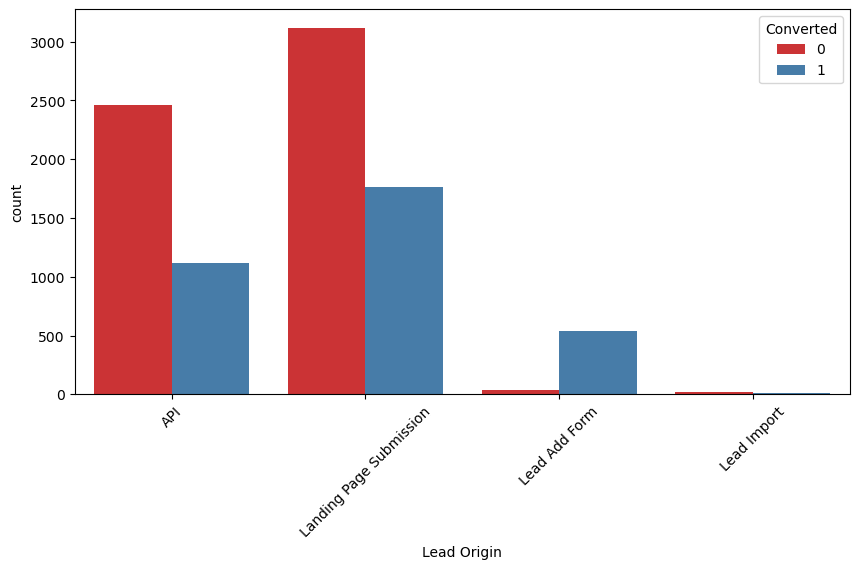

In [704]:
#Lead Origin
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 45)

In [705]:
# Inference :
# API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
# Lead Add Form has more than 90% conversion rate but count of lead are not very high.
# Lead Import are very less in count.
# To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

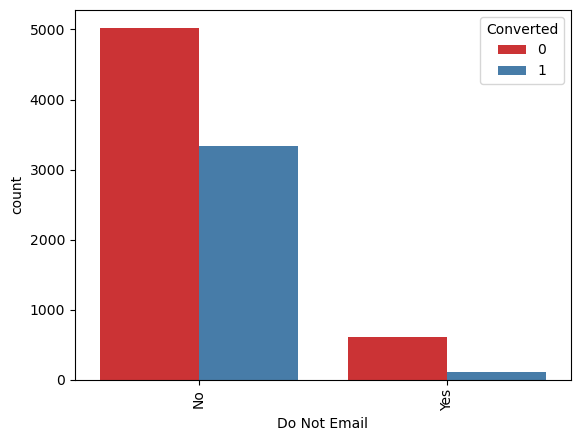

In [708]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [709]:
# Inference
# Most entries are 'No'. No Inference can be drawn with this parameter.

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

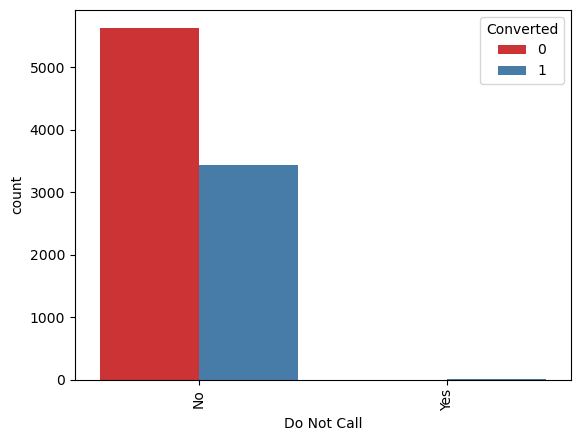

In [712]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [713]:
# Inference
# Most entries are 'No'. No Inference can be drawn with this parameter.

In [716]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: ylabel='TotalVisits'>

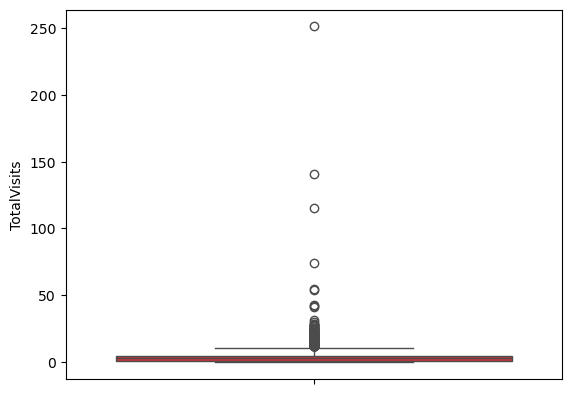

In [718]:
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

In [720]:
# As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis

In [722]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: ylabel='TotalVisits'>

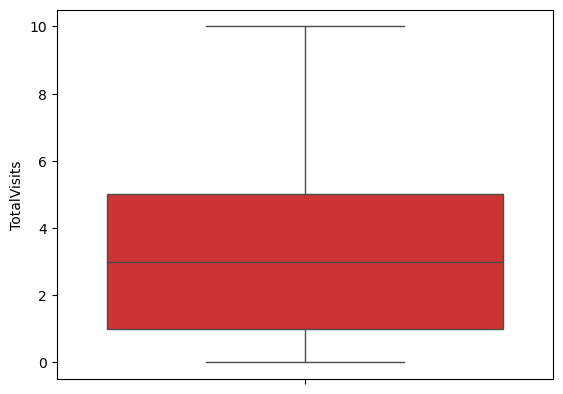

In [724]:
# Visualizing again
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

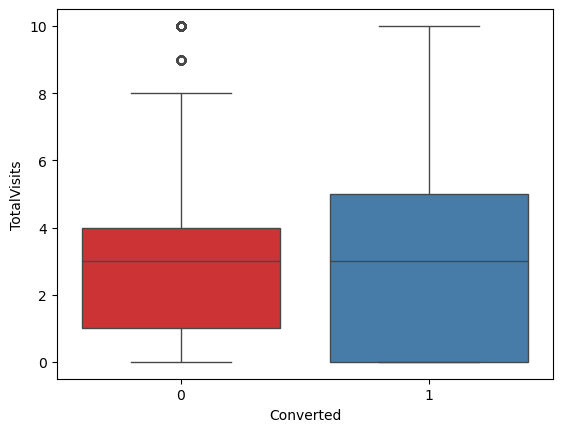

In [725]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data,palette='Set1')

In [727]:
# Inference
# Median for converted and not converted leads are the same hence no conclusion from this.

In [730]:
lead_data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: ylabel='Total Time Spent on Website'>

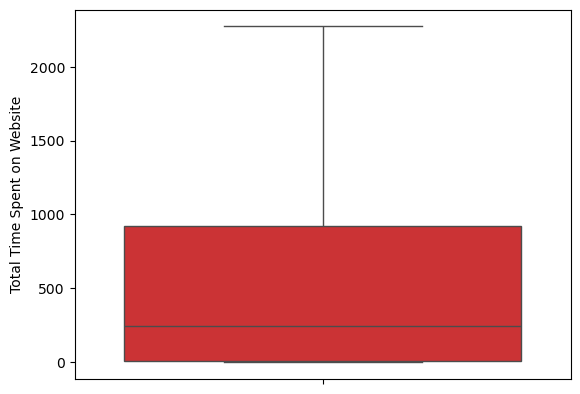

In [732]:
sns.boxplot(lead_data['Total Time Spent on Website'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

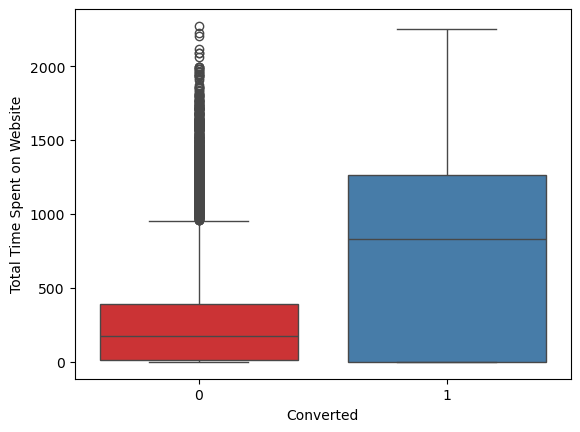

In [733]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data,palette='Set1')

In [735]:
# Inference
# Leads spending more time on the weblise are more likely to be converted.
# Website should be made more engaging to make leads spend more time.

In [738]:
lead_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: ylabel='Page Views Per Visit'>

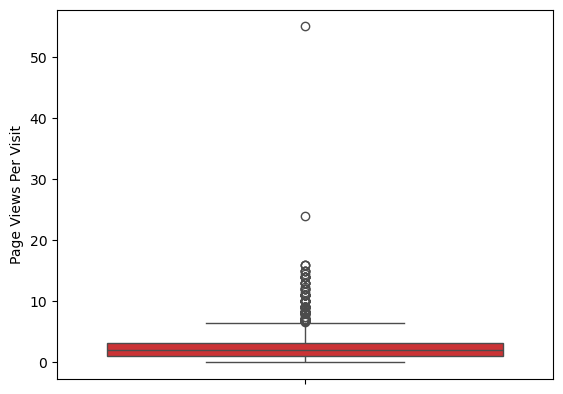

In [740]:
sns.boxplot(lead_data['Page Views Per Visit'],orient='vert',palette='Set1')

In [742]:
# As we can see there are a number of outliers in the data. We will cap the outliers to 90% value for analysis.

In [744]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: ylabel='Page Views Per Visit'>

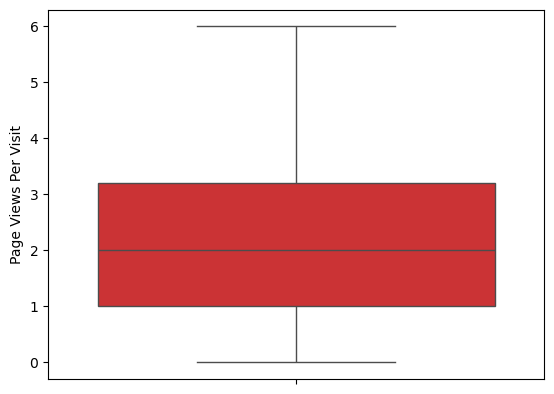

In [746]:
# Visualizing again
sns.boxplot(lead_data['Page Views Per Visit'],palette='Set1',orient='vert')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

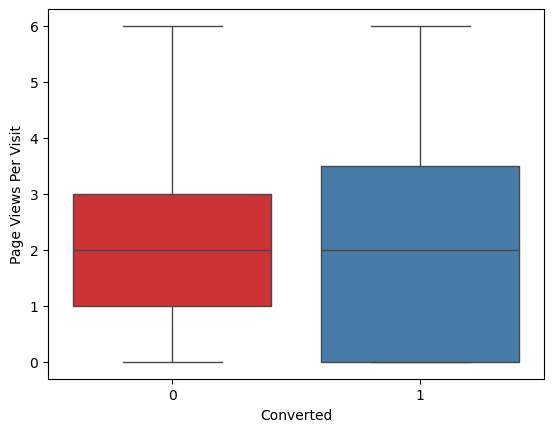

In [748]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_data,palette='Set1')

In [750]:
#Inference
# Median for converted and unconverted leads is the same.
# Nothing can be said specifically for lead conversion from Page Views Per Visit

In [752]:
lead_data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

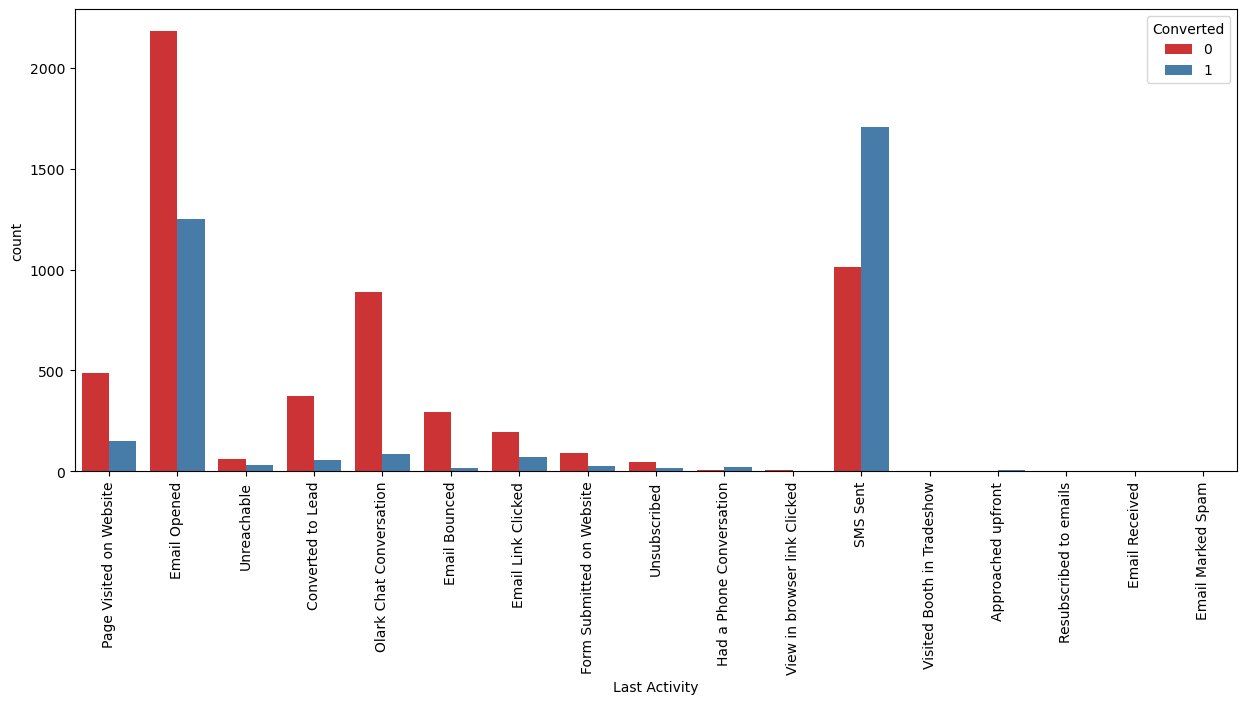

In [754]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [756]:
# We can club the least activities to "Other_Activity" which are having less data.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

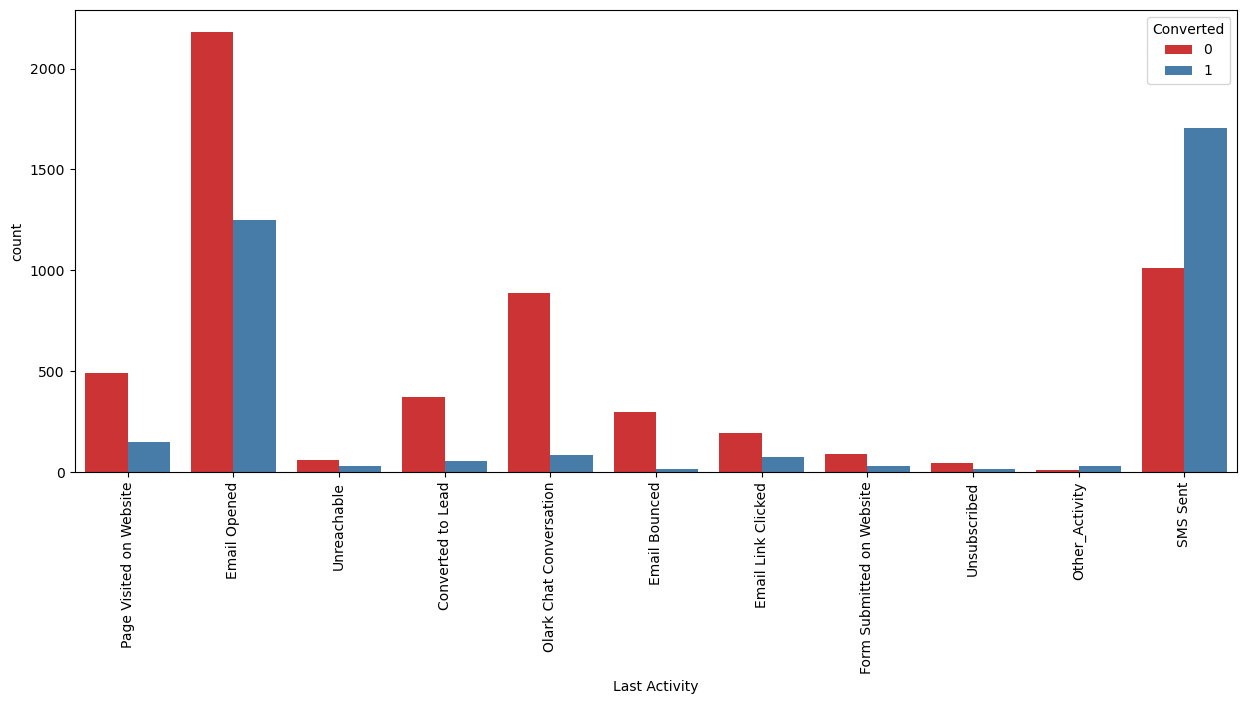

In [758]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [760]:
# Inference
# Most of the lead have their Email opened as their last activity.
# Conversion rate for leads with last activity as SMS Sent is almost 60%.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Other Courses'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

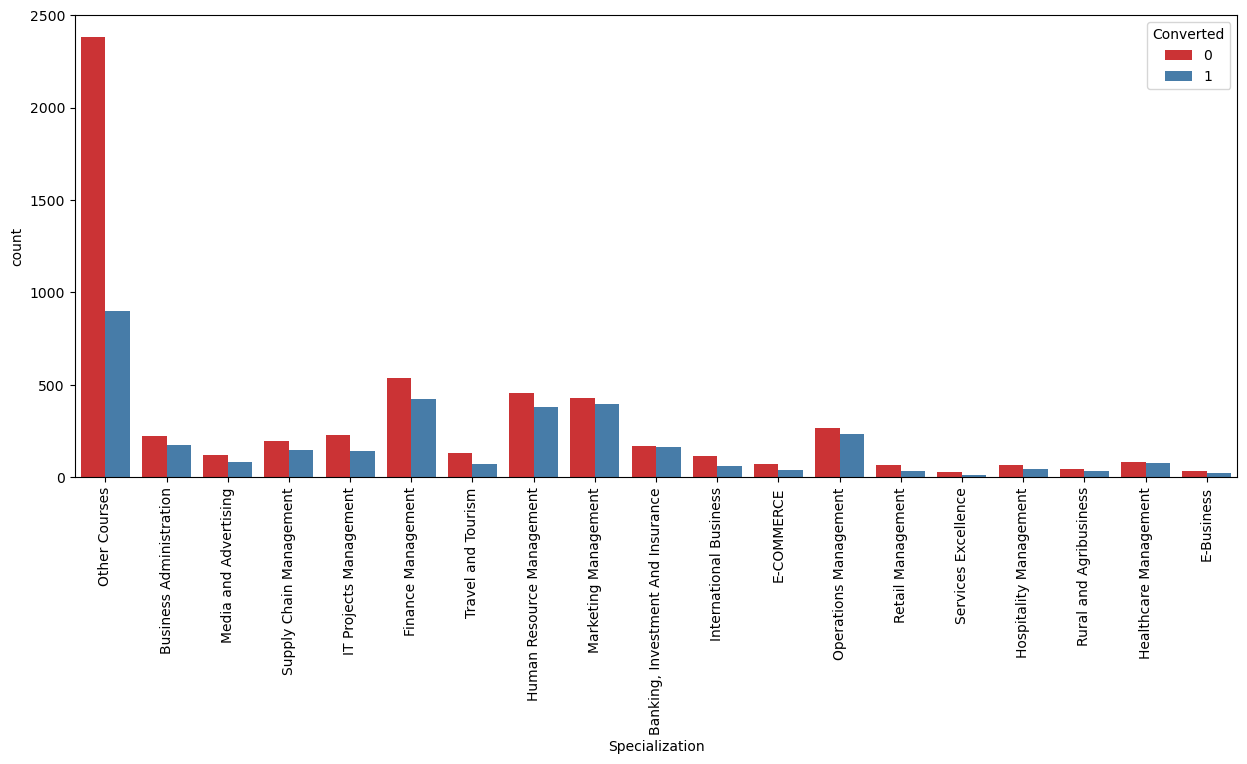

In [762]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [763]:
# Inference
# Focus should be more on the Specialization with high conversion rate.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

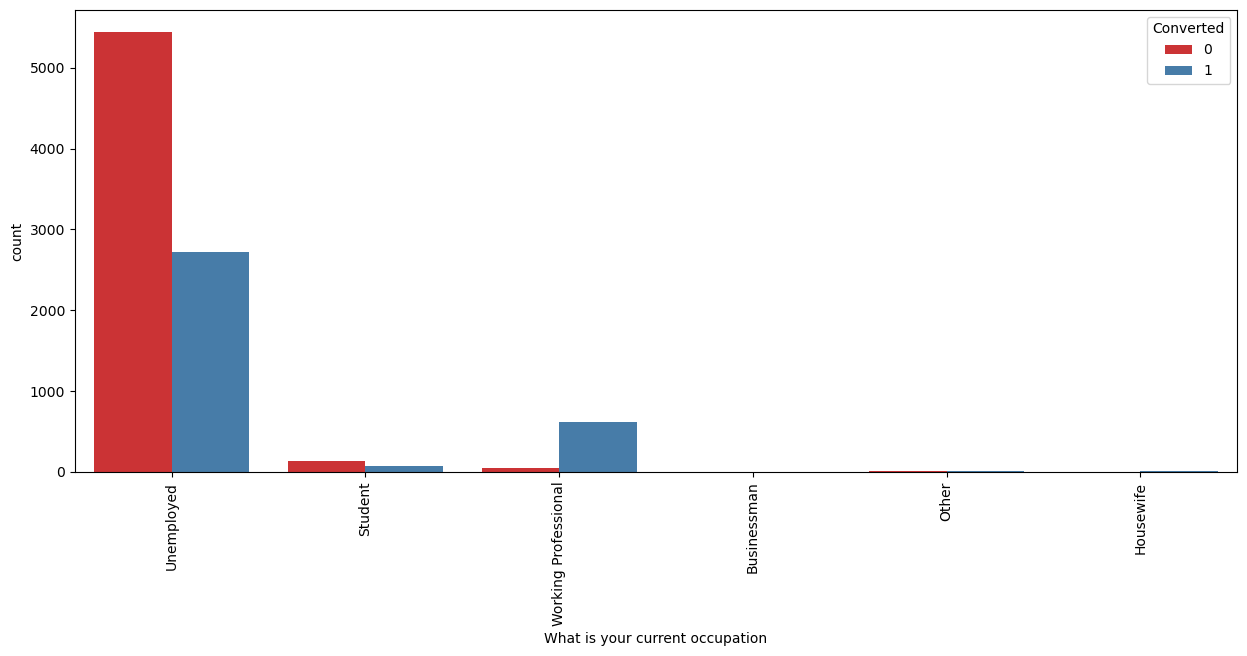

In [766]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [768]:
# Inference
# Working Professionals going for the course have high chances of joining it.
# Unemployed leads are the most in numbers but has around 30-35% conversion rate.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0,

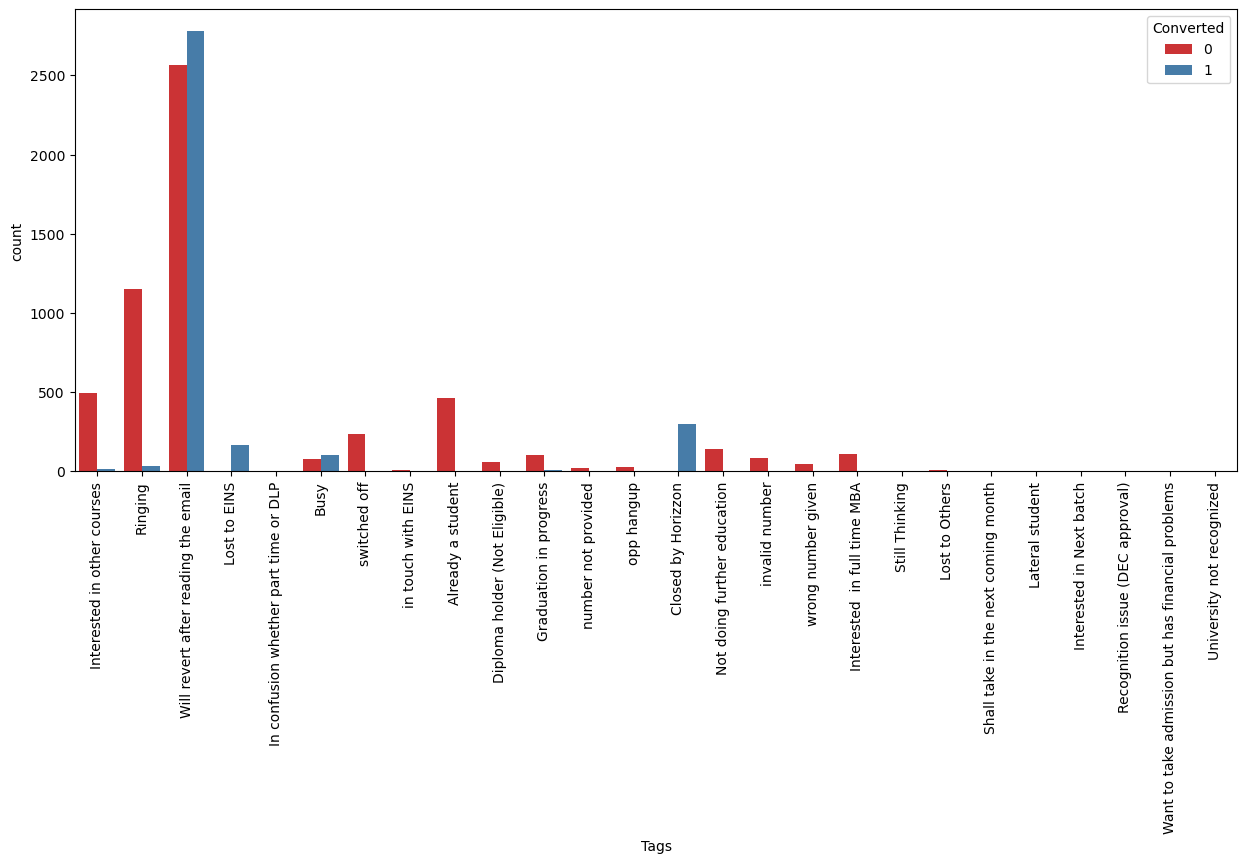

In [770]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [772]:
#Will need to remove this column as it looks irrelevant as this is for tracking the status of prospects decision

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

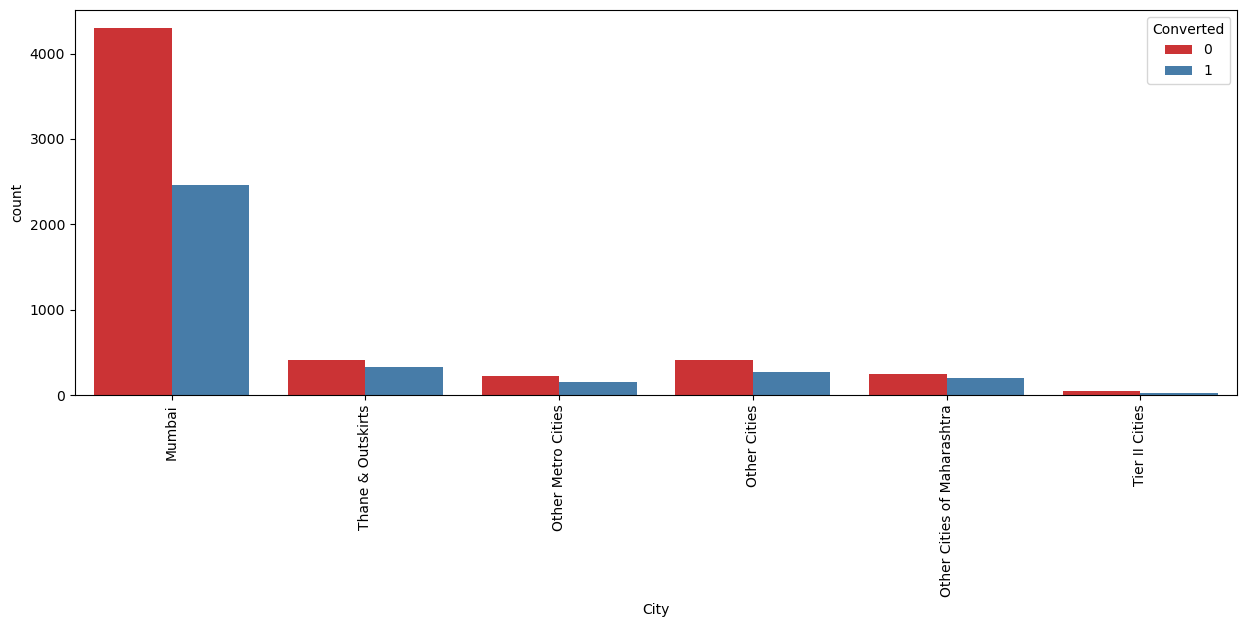

In [774]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [776]:
# Inference
# Most leads are from mumbai with around 50% conversion rate.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

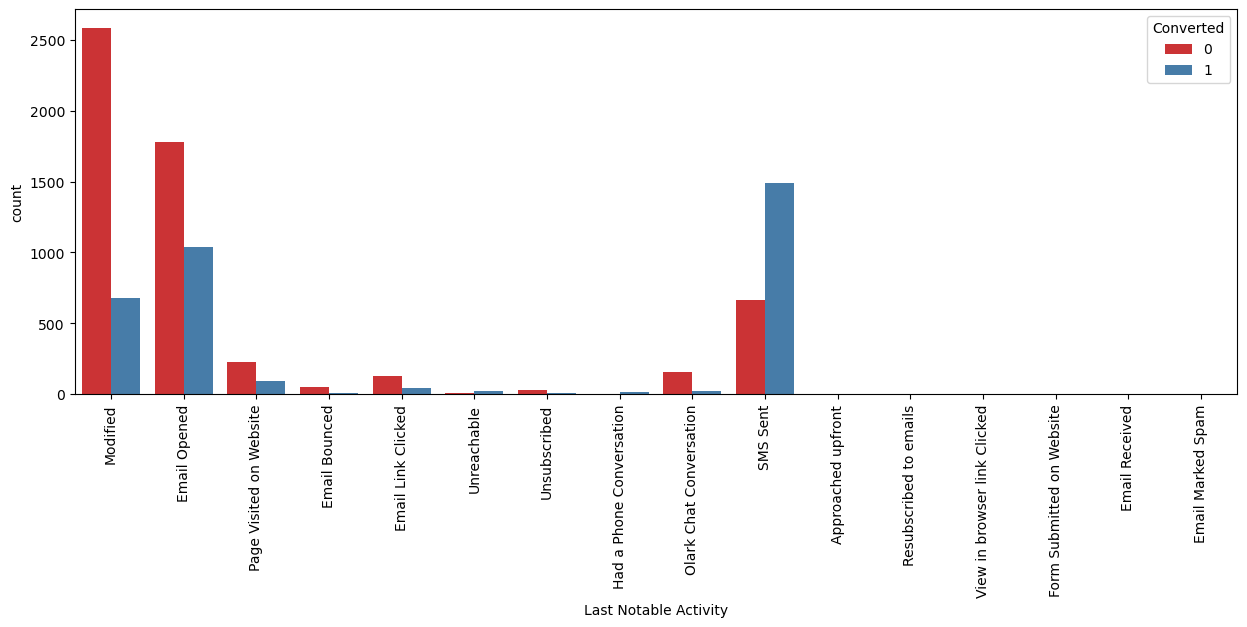

In [778]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)


In [780]:
# Results
# Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [782]:
lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'], axis=1)

In [784]:
lead_data.shape

(9074, 14)

In [786]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                     

In [788]:
 # Converting some binary variables (Yes/No) to 1/0
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

In [790]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [792]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,False,False,True,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,False,False,True,False,False,False,False,False,False,False


In [794]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [796]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,True,False,False,...,False,False,True,False,False,False,False,False,False,False


In [798]:

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,0,5.0,674,2.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,2.0,1532,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,1.0,305,1.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0,0,2.0,1428,1.0,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [800]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [802]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [804]:
#Scaling the Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1012,1,0,-0.432779,-0.540048,-0.155018,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9226,0,0,-1.150329,-0.888650,-1.265540,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4750,0,0,-0.432779,1.643304,-0.155018,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7987,0,0,0.643547,2.017593,0.122613,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [806]:
# Checking the Lead Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

In [812]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Initialize RFE with the correct number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

In [814]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False])

In [816]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 28),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 41),
 ('Lead Source_Others', False, 34),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 54),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 35),
 ('Last Activity_Email Bounced', False, 22),
 ('Last Activity_Email Link Clicked', False, 17),
 ('Last Activity_Email Opened', False, 10),
 ('Last Activity_Form Submitted on Website', False, 38),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 16),

In [818]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Unsubscribed', 'Specialization_Other Courses',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [820]:
import statsmodels.api as sm

In [428]:
#Model Building

In [822]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [824]:
print(X_train[cols].dtypes)
print(y_train.dtype)

Do Not Email                                              int64
Total Time Spent on Website                             float64
Lead Origin_Landing Page Submission                        bool
Lead Origin_Lead Add Form                                  bool
Lead Source_Olark Chat                                     bool
Lead Source_Welingak Website                               bool
Last Activity_Olark Chat Conversation                      bool
Last Activity_Other_Activity                               bool
Last Activity_Unsubscribed                                 bool
Specialization_Other Courses                               bool
What is your current occupation_Housewife                  bool
What is your current occupation_Working Professional       bool
Last Notable Activity_Had a Phone Conversation             bool
Last Notable Activity_SMS Sent                             bool
Last Notable Activity_Unreachable                          bool
dtype: object
int64


In [826]:
X_train[cols] = X_train[cols].astype(int)

In [828]:
print(X_train[cols].dtypes)

Do Not Email                                            int32
Total Time Spent on Website                             int32
Lead Origin_Landing Page Submission                     int32
Lead Origin_Lead Add Form                               int32
Lead Source_Olark Chat                                  int32
Lead Source_Welingak Website                            int32
Last Activity_Olark Chat Conversation                   int32
Last Activity_Other_Activity                            int32
Last Activity_Unsubscribed                              int32
Specialization_Other Courses                            int32
What is your current occupation_Housewife               int32
What is your current occupation_Working Professional    int32
Last Notable Activity_Had a Phone Conversation          int32
Last Notable Activity_SMS Sent                          int32
Last Notable Activity_Unreachable                       int32
dtype: object


In [830]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2815.7
Date:                Tue, 27 Aug 2024   Deviance:                       5631.3
Time:                        17:10:55   Pearson chi2:                 6.63e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3600
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3425      0.118     -2.914      0.004      -0.573      -0.112
Do Not Email                                            -1.7811      0.181     -9.846      0.000      -2.136      -1.427
Total Time Spent on Website                              1.3436      0.065     20.793      0.000       1.217       1.470
Lead Origin_Landing Page Submission                     -1.2410      0.121    -10.220      0.000      -1.479      -1.003
Lead Origin_Lead Add Form                                2.4645      0.229     10.741      0.000       2.015       2.914
Lead Source_Olark Chat                                   0.3502      0.111      3.162      0.002       0.133       0.567
Lead Source_Welingak Website                             2.7726      0.760      3.648      0.000       1.283       4.262
Last Activity_Olark Chat Conversation                   -1.3527      0.161     -8.415      0.000      -1.668      -1.038
Last Activity_Other_Activity                             1.3558      0.490      2.766      0.006       0.395       2.316
Last Activity_Unsubscribed                               1.5406      0.452      3.409      0.001       0.655       2.426
Specialization_Other Courses                            -1.3063      0.120    -10.931      0.000      -1.541      -1.072
What is your current occupation_Housewife               22.7389   1.53e+04      0.001      0.999      -3e+04    3.01e+04
What is your current occupation_Working Professional     2.6214      0.186     14.122      0.000       2.258       2.985
Last Notable Activity_Had a Phone Conversation           1.9049      1.181      1.613      0.107      -0.410       4.220
Last Notable Activity_SMS Sent                           1.6604      0.076     21.784      0.000       1.511       1.810
Last Notable Activity_Unreachable                        1.6621      0.462      3.596      0.000       0.756       2.568
========================================================================================================================
"""

In [832]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

In [834]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2820.7
Date:                Tue, 27 Aug 2024   Deviance:                       5641.4
Time:                        17:11:33   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3590
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3355      0.117     -2.859      0.004      -0.566      -0.105
Do Not Email                                            -1.7843      0.181     -9.864      0.000      -2.139      -1.430
Total Time Spent on Website                              1.3430      0.065     20.793      0.000       1.216       1.470
Lead Origin_Landing Page Submission                     -1.2416      0.121    -10.239      0.000      -1.479      -1.004
Lead Origin_Lead Add Form                                2.4767      0.229     10.809      0.000       2.028       2.926
Lead Source_Olark Chat                                   0.3494      0.111      3.156      0.002       0.132       0.566
Lead Source_Welingak Website                             2.7604      0.760      3.632      0.000       1.271       4.250
Last Activity_Olark Chat Conversation                   -1.3548      0.161     -8.428      0.000      -1.670      -1.040
Last Activity_Other_Activity                             1.3525      0.490      2.759      0.006       0.392       2.313
Last Activity_Unsubscribed                               1.5388      0.452      3.405      0.001       0.653       2.424
Specialization_Other Courses                            -1.3116      0.119    -10.986      0.000      -1.546      -1.078
What is your current occupation_Working Professional     2.6165      0.186     14.096      0.000       2.253       2.980
Last Notable Activity_Had a Phone Conversation           1.9020      1.181      1.610      0.107      -0.413       4.217
Last Notable Activity_SMS Sent                           1.6558      0.076     21.734      0.000       1.506       1.805
Last Notable Activity_Unreachable                        1.6573      0.462      3.585      0.000       0.751       2.563
========================================================================================================================
"""

In [243]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [836]:
print(X_train[col1].dtypes)
print(y_train.dtype)

Do Not Email                                            int32
Total Time Spent on Website                             int32
Lead Origin_Landing Page Submission                     int32
Lead Origin_Lead Add Form                               int32
Lead Source_Olark Chat                                  int32
Lead Source_Welingak Website                            int32
Last Activity_Olark Chat Conversation                   int32
Last Activity_Other_Activity                            int32
Last Activity_Unsubscribed                              int32
Specialization_Other Courses                            int32
What is your current occupation_Working Professional    int32
Last Notable Activity_Had a Phone Conversation          int32
Last Notable Activity_SMS Sent                          int32
Last Notable Activity_Unreachable                       int32
dtype: object
int64


In [838]:
import statsmodels.api as sm

# Ensure constant column is added
X_train_sm = sm.add_constant(X_train[col1])

# Fit the GLM model
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()

# Display the summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2820.7
Date:                Tue, 27 Aug 2024   Deviance:                       5641.4
Time:                        17:12:36   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3590
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [840]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [842]:
# Add a constant to the model
X_train_sm = sm.add_constant(X_train[col1])

# Fit the GLM model with a binomial family
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()

# Display the summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2822.4
Date:                Tue, 27 Aug 2024   Deviance:                       5644.7
Time:                        17:14:08   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3587
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [848]:
print(col1)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Unsubscribed', 'Specialization_Other Courses',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [850]:
if 'What is your current occupation_Student' in col1:
    col1 = col1.drop('What is your current occupation_Student')
else:
    print("'What is your current occupation_Student' not found in col1.")

'What is your current occupation_Student' not found in col1.


In [852]:
# Add a constant to the model
X_train_sm = sm.add_constant(X_train[col1])

# Fit the GLM model with a binomial family
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm4.fit()

# Display the summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2822.4
Date:                Tue, 27 Aug 2024   Deviance:                       5644.7
Time:                        17:16:50   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3587
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [854]:
col1 = col1.drop('Lead Origin_Lead Add Form')

In [856]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2902.4
Date:                Tue, 27 Aug 2024   Deviance:                       5804.8
Time:                        17:17:13   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3423
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2722      0.104      2.622      0.009       0.069       0.476
Do Not Email                                            -1.7295      0.176     -9.840      0.000      -2.074      -1.385
Total Time Spent on Website                              1.2631      0.064     19.801      0.000       1.138       1.388
Lead Origin_Landing Page Submission                     -1.8288      0.111    -16.549      0.000      -2.045      -1.612
Lead Source_Olark Chat                                   0.0169      0.106      0.159      0.874      -0.191       0.225
Lead Source_Welingak Website                             4.9211      0.731      6.733      0.000       3.489       6.354
Last Activity_Olark Chat Conversation                   -1.4209      0.160     -8.860      0.000      -1.735      -1.107
Last Activity_Other_Activity                             1.8111      0.426      4.249      0.000       0.976       2.647
Last Activity_Unsubscribed                               1.4041      0.451      3.116      0.002       0.521       2.287
Specialization_Other Courses                            -1.6293      0.113    -14.372      0.000      -1.852      -1.407
What is your current occupation_Working Professional     2.6640      0.184     14.453      0.000       2.303       3.025
Last Notable Activity_SMS Sent                           1.6931      0.075     22.535      0.000       1.546       1.840
Last Notable Activity_Unreachable                        1.5910      0.461      3.450      0.001       0.687       2.495
========================================================================================================================
"""

In [858]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Other Courses,1.96
3,Lead Source_Olark Chat,1.86
2,Lead Origin_Landing Page Submission,1.47
5,Last Activity_Olark Chat Conversation,1.44
10,Last Notable Activity_SMS Sent,1.38
1,Total Time Spent on Website,1.29
0,Do Not Email,1.18
9,What is your current occupation_Working Profes...,1.09
4,Lead Source_Welingak Website,1.07
7,Last Activity_Unsubscribed,1.07


In [864]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2902.4
Date:                Tue, 27 Aug 2024   Deviance:                       5804.8
Time:                        17:17:59   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3423
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2722      0.104      2.622      0.009       0.069       0.476
Do Not Email                                            -1.7295      0.176     -9.840      0.000      -2.074      -1.385
Total Time Spent on Website                              1.2631      0.064     19.801      0.000       1.138       1.388
Lead Origin_Landing Page Submission                     -1.8288      0.111    -16.549      0.000      -2.045      -1.612
Lead Source_Olark Chat                                   0.0169      0.106      0.159      0.874      -0.191       0.225
Lead Source_Welingak Website                             4.9211      0.731      6.733      0.000       3.489       6.354
Last Activity_Olark Chat Conversation                   -1.4209      0.160     -8.860      0.000      -1.735      -1.107
Last Activity_Other_Activity                             1.8111      0.426      4.249      0.000       0.976       2.647
Last Activity_Unsubscribed                               1.4041      0.451      3.116      0.002       0.521       2.287
Specialization_Other Courses                            -1.6293      0.113    -14.372      0.000      -1.852      -1.407
What is your current occupation_Working Professional     2.6640      0.184     14.453      0.000       2.303       3.025
Last Notable Activity_SMS Sent                           1.6931      0.075     22.535      0.000       1.546       1.840
Last Notable Activity_Unreachable                        1.5910      0.461      3.450      0.001       0.687       2.495
========================================================================================================================
"""

In [868]:
# Dropping the column  'Lead Origin_Lead Import' because it has high Pvalue
col1 = col1.drop('Lead Source_Olark Chat')

In [870]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2902.4
Date:                Tue, 27 Aug 2024   Deviance:                       5804.8
Time:                        17:20:29   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3423
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2762      0.101      2.746      0.006       0.079       0.473
Do Not Email                                            -1.7293      0.176     -9.839      0.000      -2.074      -1.385
Total Time Spent on Website                              1.2617      0.063     19.968      0.000       1.138       1.386
Lead Origin_Landing Page Submission                     -1.8324      0.108    -16.944      0.000      -2.044      -1.620
Lead Source_Welingak Website                             4.9141      0.730      6.736      0.000       3.484       6.344
Last Activity_Olark Chat Conversation                   -1.4161      0.158     -8.989      0.000      -1.725      -1.107
Last Activity_Other_Activity                             1.8110      0.426      4.249      0.000       0.976       2.646
Last Activity_Unsubscribed                               1.4039      0.451      3.116      0.002       0.521       2.287
Specialization_Other Courses                            -1.6267      0.112    -14.510      0.000      -1.846      -1.407
What is your current occupation_Working Professional     2.6633      0.184     14.455      0.000       2.302       3.024
Last Notable Activity_SMS Sent                           1.6931      0.075     22.536      0.000       1.546       1.840
Last Notable Activity_Unreachable                        1.5905      0.461      3.449      0.001       0.687       2.494
========================================================================================================================
"""

In [872]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.47
7,Specialization_Other Courses,1.46
9,Last Notable Activity_SMS Sent,1.37
4,Last Activity_Olark Chat Conversation,1.31
1,Total Time Spent on Website,1.29
0,Do Not Email,1.18
8,What is your current occupation_Working Profes...,1.09
6,Last Activity_Unsubscribed,1.07
3,Lead Source_Welingak Website,1.05
5,Last Activity_Other_Activity,1.01


In [874]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
col1 = col1.drop('Last Activity_Unsubscribed')

In [876]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.6
Date:                Tue, 27 Aug 2024   Deviance:                       5813.1
Time:                        17:21:06   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3415
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2808      0.101      2.792      0.005       0.084       0.478
Do Not Email                                            -1.5896      0.165     -9.644      0.000      -1.913      -1.267
Total Time Spent on Website                              1.2629      0.063     20.004      0.000       1.139       1.387
Lead Origin_Landing Page Submission                     -1.8337      0.108    -16.957      0.000      -2.046      -1.622
Lead Source_Welingak Website                             4.8761      0.728      6.700      0.000       3.450       6.302
Last Activity_Olark Chat Conversation                   -1.4228      0.157     -9.034      0.000      -1.731      -1.114
Last Activity_Other_Activity                             1.7916      0.425      4.212      0.000       0.958       2.625
Specialization_Other Courses                            -1.6254      0.112    -14.503      0.000      -1.845      -1.406
What is your current occupation_Working Professional     2.6646      0.184     14.496      0.000       2.304       3.025
Last Notable Activity_SMS Sent                           1.6803      0.075     22.451      0.000       1.534       1.827
Last Notable Activity_Unreachable                        1.5822      0.460      3.437      0.001       0.680       2.485
========================================================================================================================
"""

In [878]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.47
6,Specialization_Other Courses,1.46
8,Last Notable Activity_SMS Sent,1.37
4,Last Activity_Olark Chat Conversation,1.31
1,Total Time Spent on Website,1.28
0,Do Not Email,1.10
7,What is your current occupation_Working Profes...,1.09
3,Lead Source_Welingak Website,1.05
5,Last Activity_Other_Activity,1.01
9,Last Notable Activity_Unreachable,1.00


In [880]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
col1 = col1.drop('Last Notable Activity_Unreachable')

In [882]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2912.5
Date:                Tue, 27 Aug 2024   Deviance:                       5825.1
Time:                        17:21:29   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3402
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2939      0.100      2.927      0.003       0.097       0.491
Do Not Email                                            -1.5929      0.165     -9.667      0.000      -1.916      -1.270
Total Time Spent on Website                              1.2596      0.063     19.994      0.000       1.136       1.383
Lead Origin_Landing Page Submission                     -1.8329      0.108    -16.972      0.000      -2.045      -1.621
Lead Source_Welingak Website                             4.8684      0.728      6.690      0.000       3.442       6.295
Last Activity_Olark Chat Conversation                   -1.4336      0.157     -9.107      0.000      -1.742      -1.125
Last Activity_Other_Activity                             1.7802      0.425      4.185      0.000       0.947       2.614
Specialization_Other Courses                            -1.6273      0.112    -14.539      0.000      -1.847      -1.408
What is your current occupation_Working Professional     2.6621      0.184     14.494      0.000       2.302       3.022
Last Notable Activity_SMS Sent                           1.6683      0.075     22.334      0.000       1.522       1.815
========================================================================================================================
"""

In [884]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.46
6,Specialization_Other Courses,1.46
8,Last Notable Activity_SMS Sent,1.37
4,Last Activity_Olark Chat Conversation,1.31
1,Total Time Spent on Website,1.28
0,Do Not Email,1.10
7,What is your current occupation_Working Profes...,1.09
3,Lead Source_Welingak Website,1.05
5,Last Activity_Other_Activity,1.01


In [886]:
# Since the Pvalues of all variables is 0 and VIF values are low for all the variables, this model is our final model.

In [888]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.176681
1012    0.109378
9226    0.208590
4750    0.800413
7987    0.727132
1281    0.532285
2880    0.176681
4971    0.961645
7536    0.727132
1248    0.430591
dtype: float64

In [890]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17668052, 0.10937842, 0.20859046, 0.80041317, 0.72713208,
       0.5322845 , 0.17668052, 0.96164503, 0.72713208, 0.43059096])

In [892]:
#Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.176681,3009
1,0,0.109378,1012
2,0,0.208590,9226
3,1,0.800413,4750
4,1,0.727132,7987


In [894]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.176681,3009,0
1,0,0.109378,1012,0
2,0,0.208590,9226,0
3,1,0.800413,4750,1
4,1,0.727132,7987,1


In [896]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3281  624]
 [ 796 1650]]


In [898]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.776413163281373


In [900]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [902]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6745707277187244


In [910]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8402048655569783


In [904]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.15979513444302176


In [906]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7255936675461742


In [908]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8047584007848908


In [912]:
#We found out that our specificity was good (~84%) but our sensitivity was only 67%. Hence, this needed to be taken care of.¶
#We have got sensitivity of 67% and this was mainly because of the cut-off point that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

In [914]:
#ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [916]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

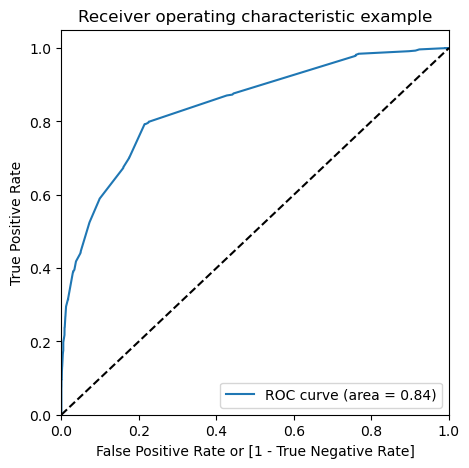

In [918]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [920]:
#Since we have higher (0.84) area under the ROC curve , therefore our model is a good one.

#Finding Optimal Cutoff Point
#Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [922]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.176681,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.109378,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.208590,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.800413,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.727132,7987,1,1,1,1,1,1,1,1,1,0,0


In [924]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.522280  0.984464  0.232778
0.2   0.2  0.687451  0.870809  0.572599
0.3   0.3  0.785860  0.793540  0.781050
0.4   0.4  0.788065  0.792314  0.785403
0.5   0.5  0.776413  0.674571  0.840205
0.6   0.6  0.754999  0.443581  0.950064
0.7   0.7  0.754527  0.441128  0.950832
0.8   0.8  0.745867  0.387163  0.970551
0.9   0.9  0.701307  0.237531  0.991805


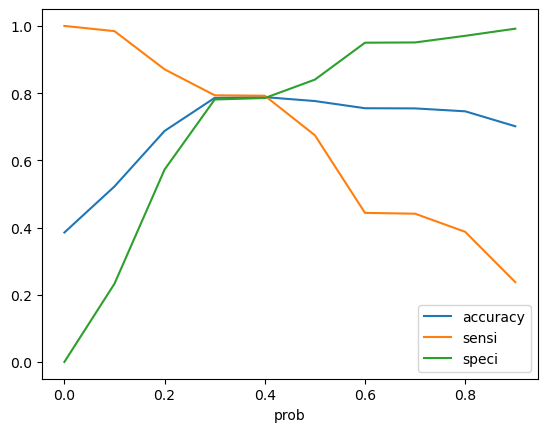

In [926]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [928]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.176681,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.109378,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.208590,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.800413,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.727132,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [930]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.176681,3009,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.109378,1012,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.208590,9226,0,1,1,1,0,0,0,0,0,0,0,0,21
3,1,0.800413,4750,1,1,1,1,1,1,1,1,1,1,0,1,80
4,1,0.727132,7987,1,1,1,1,1,1,1,1,1,0,0,1,73


In [932]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7880648716737522


In [934]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3067,  838],
       [ 508, 1938]], dtype=int64)

In [936]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [938]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7923139820114473


In [940]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7854033290653009


In [942]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.2145966709346991


In [944]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.6981268011527377


In [946]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8579020979020979


In [948]:
#Precision and Recall

In [950]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3281,  624],
       [ 796, 1650]], dtype=int64)

In [952]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7255936675461742


In [954]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6745707277187244


In [956]:
from sklearn.metrics import precision_score, recall_score

In [958]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7255936675461742


In [960]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6745707277187244


In [962]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted


(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [964]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


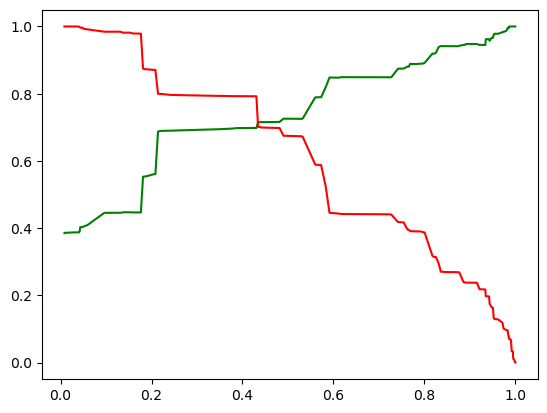

In [966]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [968]:
# Making predictions on the test set

In [970]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])


In [972]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Specialization_Other Courses,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent
3271,0,-0.600595,False,False,False,False,True,False,False
1490,0,1.887326,True,False,False,False,False,True,False
7936,0,-0.752879,False,False,False,False,True,False,False
4216,0,-0.888650,False,False,False,False,False,False,False
3830,0,-0.587751,True,False,False,False,False,False,False


In [976]:
print(X_test_sm.isnull().sum())

const                                                   0
Do Not Email                                            0
Total Time Spent on Website                             0
Lead Origin_Landing Page Submission                     0
Lead Source_Welingak Website                            0
Last Activity_Olark Chat Conversation                   0
Last Activity_Other_Activity                            0
Specialization_Other Courses                            0
What is your current occupation_Working Professional    0
Last Notable Activity_SMS Sent                          0
dtype: int64


In [978]:
print(X_test_sm.dtypes)

const                                                   float64
Do Not Email                                              int64
Total Time Spent on Website                             float64
Lead Origin_Landing Page Submission                        bool
Lead Source_Welingak Website                               bool
Last Activity_Olark Chat Conversation                      bool
Last Activity_Other_Activity                               bool
Specialization_Other Courses                               bool
What is your current occupation_Working Professional       bool
Last Notable Activity_SMS Sent                             bool
dtype: object


In [980]:
X_test_sm = X_test_sm.apply(pd.to_numeric, errors='coerce')

In [984]:
# Add constant to the test set
X_test_sm = sm.add_constant(X_test)

# Ensure all data in X_test_sm is numeric
X_test_sm = X_test_sm.apply(pd.to_numeric, errors='coerce')

# Check and handle missing values
if X_test_sm.isnull().sum().sum() > 0:
    X_test_sm = X_test_sm.dropna()  # You can also choose to fillna() instead of dropna()

# Making predictions on the test set
try:
    y_test_pred = res.predict(X_test_sm)
    print(y_test_pred[:10])
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: loop of ufunc does not support argument 0 of type float which has no callable exp method


In [996]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Add constant to the test set
X_test_sm = sm.add_constant(X_test)

# Convert bool columns to int
X_test_sm = X_test_sm.astype({col: 'int64' for col in X_test_sm.select_dtypes(include=['bool']).columns})

# Ensure all data in X_test_sm is numeric
X_test_sm = X_test_sm.apply(pd.to_numeric, errors='coerce')

# Replace infinite values (inf, -inf) with NaN
X_test_sm.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values by dropping them
X_test_sm.dropna(inplace=True)

# Debug: Check for any remaining non-numeric or problematic data
try:
    np.testing.assert_array_equal(X_test_sm.dtypes.values, np.array([np.float64] * X_test_sm.shape[1]))
    print("All columns are numeric and clean.")
except AssertionError:
    print("There is a data type issue. Column types are:")
    print(X_test_sm.dtypes)

# Making predictions on the test set
try:
    y_test_pred = res.predict(X_test_sm)
    print(y_test_pred[:10])
except Exception as e:
    print(f"An error occurred: {e}")

There is a data type issue. Column types are:
const                                                   float64
Do Not Email                                              int64
Total Time Spent on Website                             float64
Lead Origin_Landing Page Submission                       int64
Lead Source_Welingak Website                              int64
Last Activity_Olark Chat Conversation                     int64
Last Activity_Other_Activity                              int64
Specialization_Other Courses                              int64
What is your current occupation_Working Professional      int64
Last Notable Activity_SMS Sent                            int64
dtype: object
3271    0.110080
1490    0.970696
7936    0.092647
4216    0.304613
3830    0.092851
1800    0.544731
6507    0.333616
4821    0.253086
4223    0.313365
4714    0.079238
dtype: float64


In [1000]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1002]:
# Let's see the head
y_pred_1.head()

,0
3271,0.110080
1490,0.970696
7936,0.092647
4216,0.304613
3830,0.092851


In [1004]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1006]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index


In [1008]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1010]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1012]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.110080
1,1,1490,0.970696
2,0,7936,0.092647
3,1,4216,0.304613
4,0,3830,0.092851


In [1014]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [1016]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [1018]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.110080
1,1490,1,0.970696
2,7936,0,0.092647
3,4216,1,0.304613
4,3830,0,0.092851


In [1020]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [1022]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.110080,0
1,1490,1,0.970696,1
2,7936,0,0.092647,0
3,4216,1,0.304613,0
4,3830,0,0.092851,0


In [1024]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7785530664708042


In [1026]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1405,  329],
       [ 274,  715]], dtype=int64)

In [1028]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1030]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7229524772497472


In [1032]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8102652825836217


In [1034]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.110080,0,11
1,1490,1,0.970696,1,97
2,7936,0,0.092647,0,9
3,4216,1,0.304613,0,30
4,3830,0,0.092851,0,9


In [1036]:
#Results :
#Comparing the values obtained for Train & Test:
#Train Data:
#Accuracy : 79 %
#Sensitivity : 79 %
#Specificity : 70 %
#Test Data:
#Accuracy : 78. %
#Sensitivity : 72. %
#Specificity : 81 %

In [1038]:
# Thus we have achieved run short of our goal of getting a ballpark of the target lead conversion rate to be around 80%.
#The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making
#good calls based on this model to get a higher lead conversion rate of 80%.

In [1040]:
#which leads to contact
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.970696,1,97
16,1946,1,0.895969,1,90
21,2461,1,0.983439,1,98
23,5822,1,0.970829,1,97
25,2684,1,0.970829,1,97
...,...,...,...,...,...
2694,1566,1,0.946429,1,95
2699,6461,1,0.985503,1,99
2703,5741,1,0.936654,1,94
2715,6299,1,0.922633,1,92


In [1042]:
#So there are 372 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [1044]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 1946, 2461, 5822, 2684, 4959, 4062, 7696, 9049, 4543, 4830,
       4365, 3542, 7347, 2504, 7674, 8596, 4003, 4963, 6947, 4807,  446,
        789, 8372, 5805, 4478, 3758,  337, 1561, 5367,  737, 9034, 6423,
       8286, 4461, 1436, 7552, 5173, 4080, 1475, 5785, 1867, 2860, 4297,
        200, 5490, 1995, 6532, 4498, 5797, 8687, 7653,  211, 2018,  243,
       6743, 3703, 3307, 3976, 5769, 1051, 1663, 3288, 6557, 8959, 7521,
       8282, 8213, 9063, 6913, 1481,  785, 3265, 3285, 7433, 3685, 3858,
       3810, 2009, 8106,  373, 3055, 7417, 4179, 4994, 8568, 7268, 4353,
       6784, 7236, 5725, 1667, 7753, 3983, 4487,  802, 8745, 4455, 4717,
        505, 6094, 4992, 7036, 2680, 7065,  112, 7157, 3827, 7175, 1675,
       6999, 5932, 5826, 8492, 6499, 3439, 4612, 7468, 7129, 4793, 1557,
       4837, 3739,  822, 8111, 2378, 5090, 5075,  855, 7699, 5638, 8077,
       2727,  720, 7489, 2961, 1542, 5656, 7909, 6728, 6332, 8461, 2427,
        174, 2674, 8065, 2095, 1568, 8597, 4865, 47

In [1046]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            4.868423
What is your current occupation_Working Professional    2.662077
Last Activity_Other_Activity                            1.780194
Last Notable Activity_SMS Sent                          1.668319
Total Time Spent on Website                             1.259561
const                                                   0.293881
Last Activity_Olark Chat Conversation                  -1.433563
Do Not Email                                           -1.592858
Specialization_Other Courses                           -1.627324
Lead Origin_Landing Page Submission                    -1.832883
dtype: float64